## Employee Attrition Data Analysis

### By: Harper Kates

### Project Started 7/1/24

## Section 1: Import Libraries

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

## Section 2: Import Data

In [137]:
df_whm = pd.read_csv("data/watson_healthcare_modified.csv", index_col = None, header = 0)
#df_wsvft = pd.read_csv("data/watson_shap_values_for_testset.csv", index_col = None, header = 0)

## Section 3: Explore the Dataset (EDA)

In [138]:
df_whm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [139]:
pd.set_option('display.max_columns', None)
df_whm.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,4,Male,79,3,1,Nurse,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,1329390,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,3,Female,81,4,1,Nurse,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,1699288,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,4,Male,67,3,1,Nurse,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,1469740,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,4,Male,44,2,3,Therapist,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,1101291,36,No,Travel_Rarely,1299,Maternity,27,3,Medical,1,3,Male,94,3,2,Nurse,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [140]:
display(pd.value_counts(df_whm["Attrition"]))
len(df_whm[df_whm["Attrition"]=="Yes"])/len(df_whm)

No     1477
Yes     199
Name: Attrition, dtype: int64

0.11873508353221957

The attrition rate in this dataset is about 11.9%, which is high considering that most jobs should aim to have an attrition rate lower than 10%.

<AxesSubplot: xlabel='Attrition', ylabel='Age'>

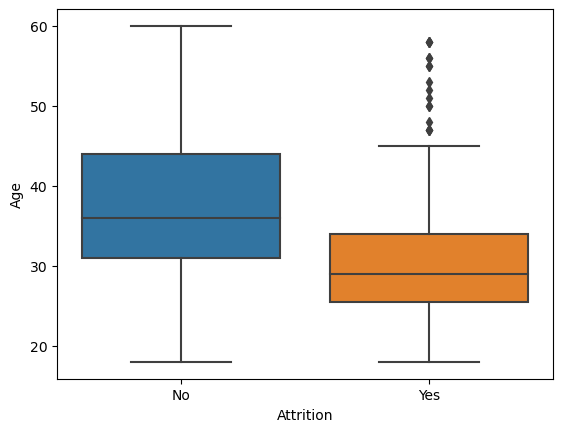

In [141]:
sns.boxplot(x = df_whm['Attrition'], y = df_whm['Age'])

When comparing attrition to age, the boxplot confirms something that is already well-known: young people are losing their jobs at a disproportionately higher rate than older people.

In [142]:
def CrossTabBoxPlot(column, tilt):
    df_whm_atbt = np.array(pd.crosstab(df_whm['Attrition'], column, margins = False))
    proportions = df_whm_atbt[1] / (df_whm_atbt[0] + df_whm_atbt[1])
    bt_categories = sorted(column.unique())
    plt.figure(figsize=(8, 5))
    plt.bar(bt_categories, proportions, color='skyblue')
    plt.ylabel('Proportion of Attrition')
    plt.xticks(rotation=tilt)
    plt.show()

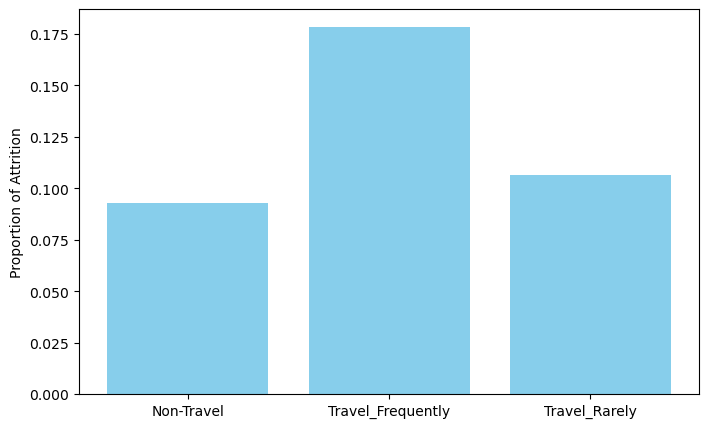

In [143]:
CrossTabBoxPlot(df_whm["BusinessTravel"], 0)

This plot shows that the more an employee makes business travels, the more likely they will be to lose their job. There are most likely other factors at play; simply making many business travels does not cause someone to lose their job.

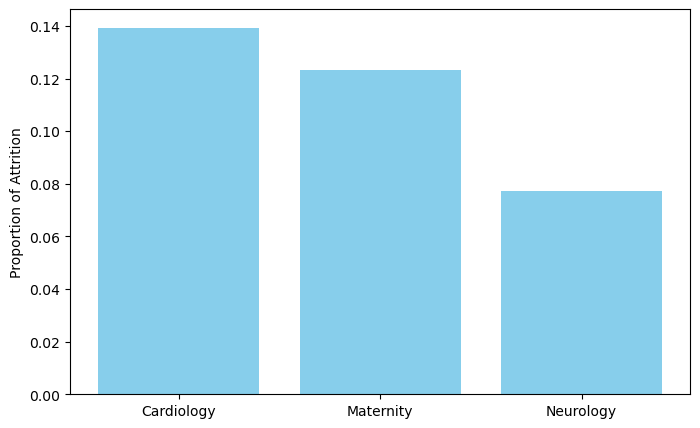

In [144]:
CrossTabBoxPlot(df_whm["Department"], 0)

This plot shows that the cardiology department has the highest rate of attrition, while neurology has the lowest rate of attrition.

In [145]:
pd.value_counts(df_whm["Department"])

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

Since neurology has the lowest number of employees in the dataset, this might suggest that the neurology hiring process is much more selective and has less turnover than in the other departments.

<AxesSubplot: xlabel='Attrition', ylabel='DistanceFromHome'>

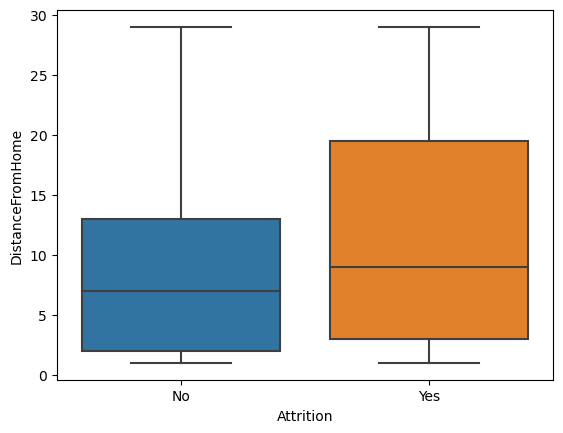

In [146]:
sns.boxplot(x = df_whm['Attrition'], y = df_whm['DistanceFromHome'])

This boxplot shows that employees who lose their jobs had to travel farther to get to work than those who did not lose their jobs.

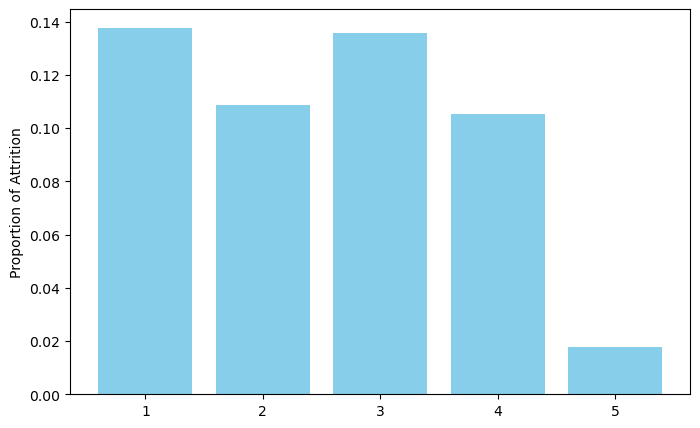

In [147]:
CrossTabBoxPlot(df_whm["Education"], 0)

The categories for the Education variable are not explicitly shown, but one can assume that 1 is the lowest level (high school education or lower), and 5 is the highest level (PhD). The attrition rates are similar for all education levels except the highest level, where the attrition rate significantly drops off. This suggests that employees with PhDs are far less likely to lose their jobs than all other employees, but the attrition rate is pretty much the same between employees with high school education and employees with master's degrees.

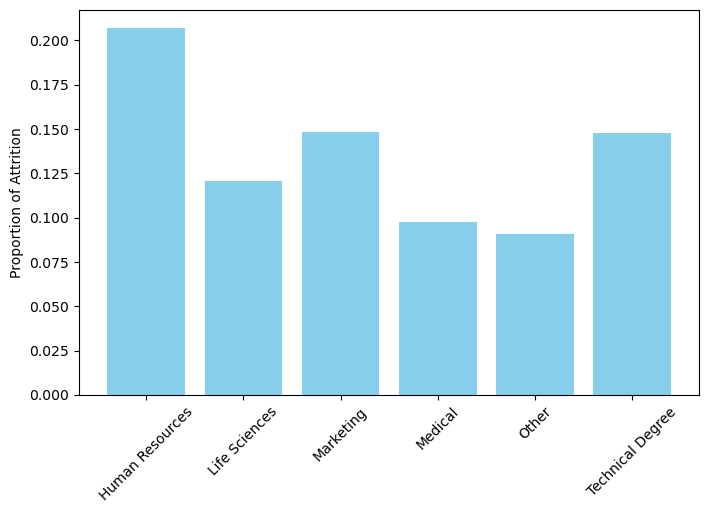

In [148]:
CrossTabBoxPlot(df_whm["EducationField"], 45)

This plot compares attrition rates between each field of education. Employees who studied human resources were the most likely to lose their jobs, while employees who studied medicine or had another unspecified degree were the least likely to lose their jobs.

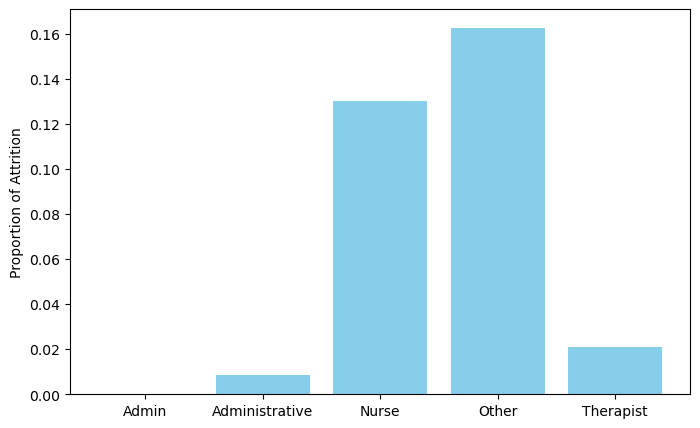

In [149]:
CrossTabBoxPlot(df_whm["JobRole"], 0)

This plot shows that employees in nursing and "other" positions have much less job security than all other positions. On the other hand, employees in administrative positions are the least likely to lose their jobs.

In [150]:
admins = df_whm[df_whm["JobRole"]=="Administrative"]
admins[admins["Attrition"]=="Yes"]

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
593,1294456,58,Yes,Travel_Rarely,286,Maternity,2,4,Life Sciences,1,4,Male,31,3,5,Administrative,2,Single,19246,25761,7,Y,Yes,12,3,4,80,0,40,2,3,31,15,13,8


This is the only person in an administrative position who lost his job. He is 58 and has been working for at least 31 years in healthcare, so one can assume that he simply retired from the workforce since he has accumulated plenty of wealth.

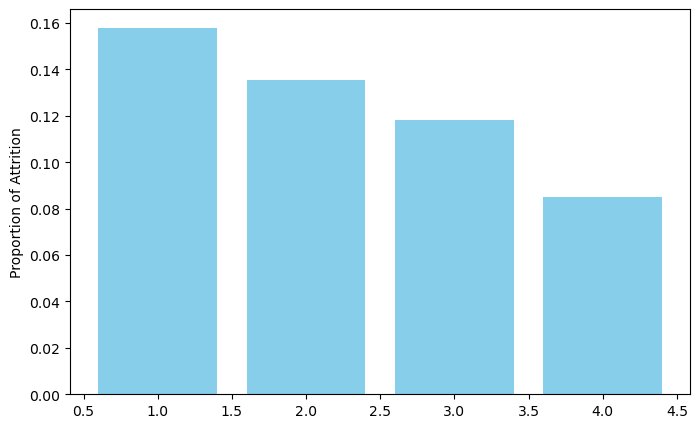

In [151]:
CrossTabBoxPlot(df_whm["JobSatisfaction"], 0)

This graph shows a steady decline in attrition rate as job satisfaction level increases. This indicates that people who are more satisfied with their job are less likely to lose their job. Because of this, one can conclude that resignation makes up a significant part of attrition in the healthcare industry.

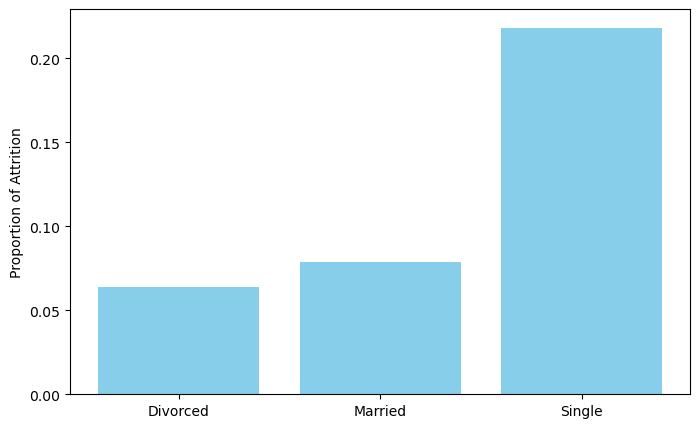

In [152]:
CrossTabBoxPlot(df_whm["MaritalStatus"], 0)

This graph shows that single employees are more likely to lose their jobs than married or divorced employees. This is a general trend in employment as a whole, as single people have historically lost their jobs at a much higher rate during recessions, according to Federal Reserve Economist Howard J Wall.

<AxesSubplot: xlabel='Attrition', ylabel='MonthlyIncome'>

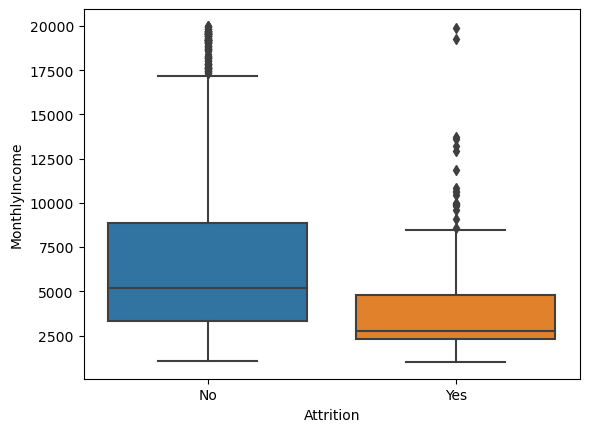

In [153]:
sns.boxplot(x = df_whm['Attrition'], y = df_whm['MonthlyIncome'])

This boxplot shows that employees who lose their jobs make significantly less money than those who do not lose their jobs. This is generally true for all forms of employment. Employees who make less money typically have less job security, whether it be through resignation, termination, or even promotion.

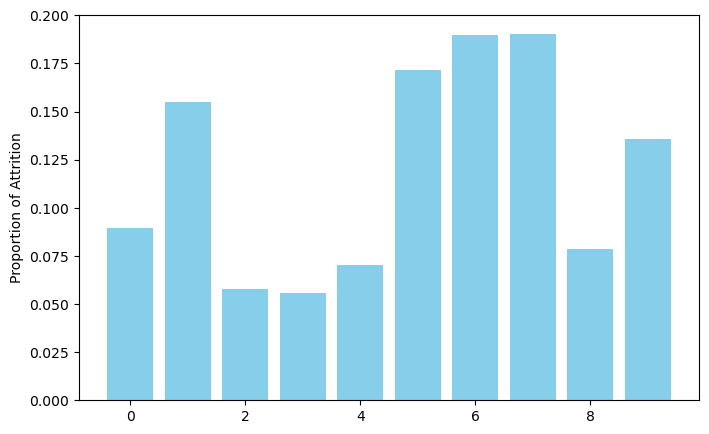

In [154]:
CrossTabBoxPlot(df_whm["NumCompaniesWorked"], 0)

This graph shows that the more companies an employee works for, the more likely they are to lose their job. This makes sense because if an employee has a history of losing or quitting jobs, they will be likely to keep changing jobs.

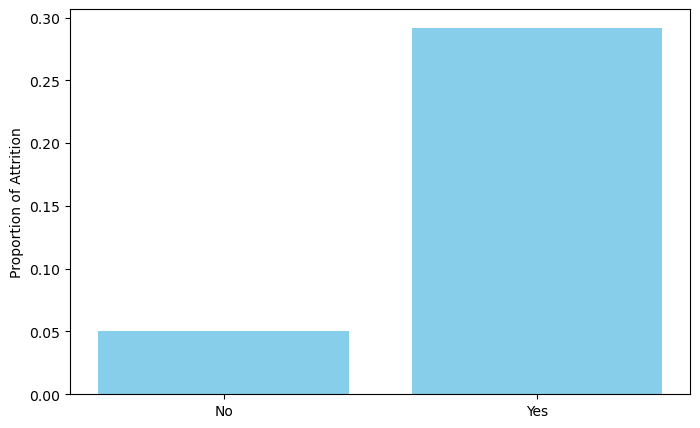

In [155]:
CrossTabBoxPlot(df_whm["OverTime"], 0)

This graph shows a staggering difference in attrition rate between employees who do and do not work overtime; employees who work overtime are about 6 times more likely to lose their jobs.

<AxesSubplot: xlabel='Attrition', ylabel='TotalWorkingYears'>

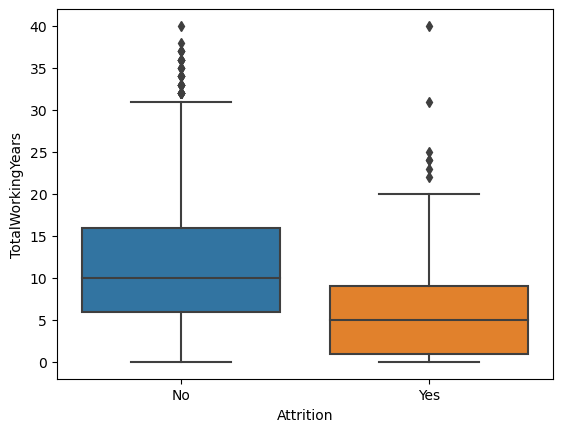

In [156]:
sns.boxplot(x = df_whm['Attrition'], y = df_whm['TotalWorkingYears'])

This graph shows that longer-tenured employees are less likely to lose their jobs. This may indicate that tenure is prevalent in the healthcare industry.

## Section 4: Preparing the Dataset for Advanced Analysis

### Section 4.1: Setting the Types

In [157]:
df_whm["Shift"] = df_whm["Shift"].astype(object)

### Section 4.2: Removing Unnecessary Variables

In [158]:
df_whm = df_whm.drop("EmployeeID", axis = 1)
df_whm = df_whm.drop("EmployeeCount", axis = 1)
df_whm = df_whm.drop("StandardHours", axis = 1)

### Section 4.3: Creating Dummy Variables

In [163]:
most_common_categories = df_whm.select_dtypes(include=['object']).mode().iloc[0]
for col in most_common_categories.index:
    most_common = most_common_categories[col]
    df_whm = pd.get_dummies(df_whm, columns=[col], drop_first=False)
    df_whm.drop(f'{col}_{most_common}', axis=1, inplace=True)
df_whm

/var/folders/s2/pcwbcsfd6px_q2f9yp2rxhhw0000gn/T/ipykernel_43239/999667431.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_whm = pd.get_dummies(df_whm, columns=[col], drop_first=False)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Cardiology,Department_Neurology,EducationField_Human Resources,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Admin,JobRole_Administrative,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Single,OverTime_Yes,Shift_1,Shift_2,Shift_3
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,8,0,1,6,4,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,10,3,3,10,7,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,7,3,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,8,3,3,8,7,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,6,3,3,2,2,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,471,24,3,3,66,1,1,4,2340,23213,1,18,3,2,1,3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1672,46,1125,10,3,3,94,2,3,4,9071,11563,2,19,3,3,15,3,3,3,2,1,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1673,20,959,1,3,4,83,2,1,2,2836,11757,1,13,3,4,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1674,39,466,1,1,4,65,2,4,4,12742,7060,1,16,3,3,21,3,3,21,6,11,8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [122]:
df_whm.head(10)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Maternity,Department_Neurology,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Shift_1,Shift_2,Shift_3
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,8,0,1,6,4,0,5,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
5,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,3,8,2,2,7,7,3,6,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
6,59,1324,3,3,3,81,4,1,1,2670,9964,4,20,4,1,12,3,2,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
7,30,1358,24,1,4,67,3,1,3,2693,13335,1,22,4,2,1,2,3,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8,38,216,23,3,4,44,2,3,3,9526,8787,0,21,4,2,10,2,3,9,7,1,8,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
9,36,1299,27,3,3,94,3,2,3,5237,16577,6,13,3,2,17,3,2,7,7,7,7,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0


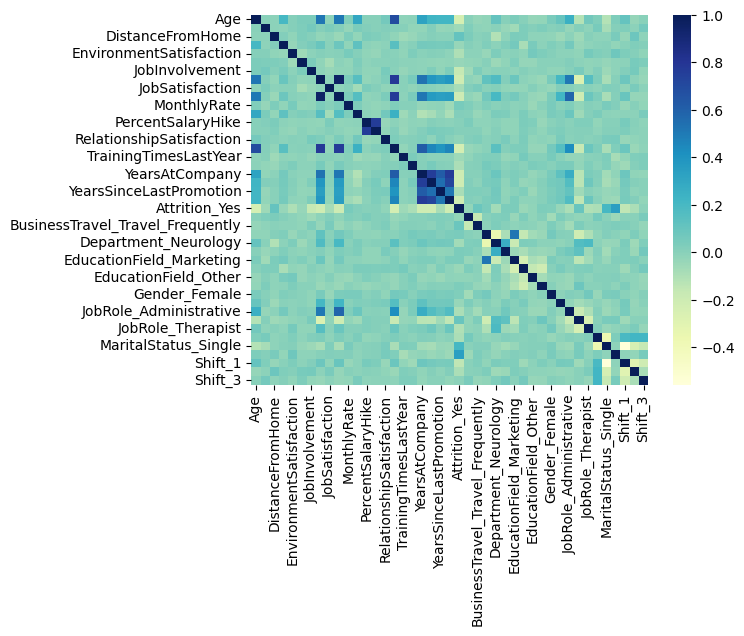

In [164]:
dataplot = sns.heatmap(df_whm.corr(), cmap="YlGnBu", annot=False)
plt.show()

This correlation heatmap shows that most of the variables have relatively weak relationships with the attrition indicator variable. The variables that have a somewhat strong relationship are almost all negatively correlated, with the exception of the strongest correlated variable, which is the overtime indicator variable. This positive correlation between the overtime and attrition variables is consistent with the bar plot in Section 3 (EDA).

## Section 5: Logistic Regression Model

### Section 5.1: First Model

In [165]:
X = df_whm.drop("Attrition_Yes", axis = 1)
y = df_whm["Attrition_Yes"]

In [166]:
lr1 = sm.Logit(y, X).fit()
lr1.summary()

         Current function value: inf
         Iterations: 35


/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1676
Model:                          Logit   Df Residuals:                     1634
Method:                           MLE   Df Model:                           41
Date:                Wed, 03 Jul 2024   Pseudo R-squ.:                     inf
Time:                        00:20:28   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0621      0.017     -3.615      0.000      -0.096      -0.028
DailyRate                           -0.0002      0.000     -0.816      0.414      -0.001       0.000
DistanceFromHome                     0.0882      0.014      6.102      0.000       0.060       0.116
Education                            0.1792      0.112      1.597      0.110      -0.041       0.399
EnvironmentSatisfaction             -0.5357      0.107     -5.018      0.000      -0.745      -0.326
HourlyRate                           0.0022      0.006      0.395      0.693      -0.009       0.013
JobInvolvement                      -0.8502      0.157     -5.400      0.000      -1.159      -0.542
JobLevel                            -0.0665      0.426     -0.156      0.876      -0.901       0.768
JobSatisfaction                     -0.4232      0.104     -4.076      0.000      -0.627      -0.220
MonthlyIncome                    -6.875e-05      0.000     -0.652      0.515      -0.000       0.000
MonthlyRate                        4.24e-05   1.61e-05      2.629      0.009    1.08e-05     7.4e-05
NumCompaniesWorked                   0.2644      0.052      5.131      0.000       0.163       0.365
PercentSalaryHike                   -0.1182      0.049     -2.403      0.016      -0.215      -0.022
PerformanceRating                    2.0390      0.406      5.025      0.000       1.244       2.834
RelationshipSatisfaction            -0.1311      0.107     -1.220      0.222      -0.342       0.079
TotalWorkingYears                   -0.1541      0.040     -3.897      0.000      -0.232      -0.077
TrainingTimesLastYear               -0.1271      0.092     -1.384      0.166      -0.307       0.053
WorkLifeBalance                     -0.6664      0.161     -4.145      0.000      -0.982      -0.351
YearsAtCompany                       0.0055      0.066      0.083      0.934      -0.125       0.136
YearsInCurrentRole                  -0.2490      0.070     -3.556      0.000      -0.386      -0.112
YearsSinceLastPromotion              0.2951      0.064      4.648      0.000       0.171       0.420
YearsWithCurrManager                -0.1287      0.074     -1.743      0.081      -0.273       0.016
BusinessTravel_Non-Travel           -0.1185      0.446     -0.266      0.791      -0.993       0.756
BusinessTravel_Travel_Frequently     1.2019      0.280      4.297      0.000       0.654       1.750
Department_Cardiology                0.5357      0.312      1.714      0.086      -0.077       1.148
Department_Neurology                -0.0625      0.375     -0.167      0.868      -0.797       0.672
EducationField_Human Resources       1.6654      0.873      1.907      0.057      -0.046       3.377
EducationField_Marketing             0.1587      0.427      0.372      0.710      -0.677       0.995
EducationField_Medical              -0.2825      0.275     -1.027      0.304      -0.822       0.257
Education

The first model contains every numerical/indicator variable in the data set. As expected, many of the variables in this model are insignificant and should be removed one by one. This next code chunk creates a function to execute this process automatically.

### Section 5.2: Removing Insignificant Variables

In [180]:
def logistic_regression_with_feature_selection(data, target, p_value_threshold=0.05):
    X = sm.add_constant(df_whm.drop("Attrition_Yes", axis = 1))  # Add constant for the intercept
    y = target

    while True:
        model = sm.Logit(y, X).fit(disp=0)
        p_values = model.pvalues
        max_p_value = p_values.max()
        
        if max_p_value < p_value_threshold:
            break
        
        # Find the variable with the highest p-value
        feature_to_remove = p_values.idxmax()
        print(f'Removing {feature_to_remove} with p-value {max_p_value}')
        
        # Drop the feature with the highest p-value
        X = X.drop(columns=[feature_to_remove])
    
    significant_vars = X.columns.tolist()
    return model, significant_vars

# Prepare the predictors and target
predictors = df_whm.drop(columns='Attrition_Yes')
target = df_whm['Attrition_Yes']

# Run the feature selection
final_model, significant_vars = logistic_regression_with_feature_selection(predictors, target)


Removing JobRole_Admin with p-value 0.999997580397032
Removing Gender_Female with p-value 0.9883059236593682
Removing Department_Neurology with p-value 0.8920202392715222
Removing JobRole_Administrative with p-value 0.8387742130828106
Removing YearsAtCompany with p-value 0.8452177139903212
Removing PerformanceRating with p-value 0.8092640288015424
Removing BusinessTravel_Non-Travel with p-value 0.791439651310005
Removing PercentSalaryHike with p-value 0.6512237872241304
Removing EducationField_Marketing with p-value 0.6203191084822661
Removing JobLevel with p-value 0.5828714249099232
Removing MaritalStatus_Divorced with p-value 0.4807043340385123
Removing JobRole_Other with p-value 0.4778201816057217
Removing EducationField_Other with p-value 0.48363956547983455
Removing HourlyRate with p-value 0.39030103854523013
Removing Education with p-value 0.35537124750812776
Removing MonthlyRate with p-value 0.19047984863133105
Removing EducationField_Technical Degree with p-value 0.162787154090

/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [172]:
final_model.summary()

/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1676
Model:                          Logit   Df Residuals:                     1654
Method:                           MLE   Df Model:                           21
Date:                Wed, 03 Jul 2024   Pseudo R-squ.:                     inf
Time:                        00:28:23   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                8.7697      1.060      8.271      0.000       6.692      10.848
Age                                 -0.0982      0.018     -5.344      0.000      -0.134      -0.062
DistanceFromHome                     0.0814      0.014      5.725      0.000       0.054       0.109
EnvironmentSatisfaction             -0.6212      0.107     -5.824      0.000      -0.830      -0.412
JobInvolvement                      -1.0682      0.163     -6.548      0.000      -1.388      -0.748
JobSatisfaction                     -0.5746      0.107     -5.372      0.000      -0.784      -0.365
MonthlyIncome                       -0.0001   5.94e-05     -2.063      0.039      -0.000   -6.09e-06
NumCompaniesWorked                   0.2567      0.050      5.111      0.000       0.158       0.355
TotalWorkingYears                   -0.1190      0.036     -3.293      0.001      -0.190      -0.048
TrainingTimesLastYear               -0.2704      0.099     -2.745      0.006      -0.464      -0.077
WorkLifeBalance                     -0.8785      0.164     -5.351      0.000      -1.200      -0.557
YearsInCurrentRole                  -0.2340      0.063     -3.692      0.000      -0.358      -0.110
YearsSinceLastPromotion              0.3139      0.060      5.222      0.000       0.196       0.432
YearsWithCurrManager                -0.1554      0.062     -2.488      0.013      -0.278      -0.033
BusinessTravel_Travel_Frequently     1.4385      0.281      5.119      0.000       0.888       1.989
Department_Cardiology                0.5639      0.256      2.202      0.028       0.062       1.066
EducationField_Medical              -0.6036      0.254     -2.374      0.018      -1.102      -0.105
JobRole_Therapist                   -1.2610      0.623     -2.023      0.043      -2.482      -0.040
MaritalStatus_Single                 1.2196      0.311      3.918      0.000       0.610       1.830
OverTime_Yes                         3.6841      0.292     12.602      0.000       3.111       4.257
Shift_1                             -1.0580      0.346     -3.061      0.002      -1.735      -0.381
Shift_2                             -1.2682      0.558     -2.272      0.023      -2.362      -0.174
====================================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The final model still contains a high number of variables, but all of them are significant, indicating that they each add something significant in terms of predicting whether attrition occurs in a given observation. The most significant variable by far was, as expected, the overtime indicator variable. According to the 95% confidence interval for the coefficient (or more specifically, e raised to the coefficient), the odds that an employee who works overtime loses their job, compared to an employee who does not work overtime, keeping all other variables constant, is between 22.4 to 1 and a staggering 70.6 to 1.

## Section 6: Comparing Predicted Values to Actual Values

In [181]:
significant_vars.remove("const")
X = df_whm[significant_vars]
y = df_whm["Attrition_Yes"]
lr_final = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/harperkates/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [183]:
y_pred = lr_final.predict(X)
y_pred.head(10)

0    0.619793
1    0.002799
2    0.723558
3    0.176296
4    0.056297
5    0.012985
6    0.070592
7    0.048212
8    0.006100
9    0.007123
dtype: float64

### Section 6.1: Confusion Matrix

In [185]:
threshold = 0.5
y_pred_class = (y_pred >= threshold).astype(int)

In [188]:
#Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1447   30]
 [  94  105]]


### Section 6.2: Accuracy, Precision, and Recall

In [189]:
accuracy = accuracy_score(y, y_pred_class)
print("Accuracy:", accuracy)
precision = precision_score(y, y_pred_class)
print("Precision:", precision)
recall = recall_score(y, y_pred_class)
print("Recall:", recall)

Accuracy: 0.9260143198090692
Precision: 0.7777777777777778
Recall: 0.5276381909547738


### Section 6.3: ROC AUC Score

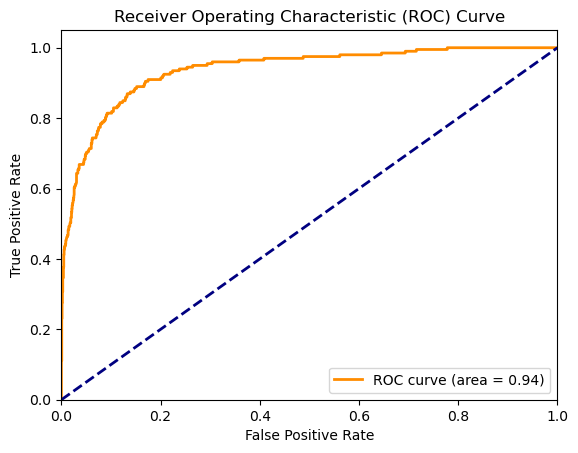

AUC: 0.9360648877427081


In [191]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

## Section 7: Filtering the Dataframe to Include Incorrect Observations

### Section 7.1: Identifying Incorrect Predictions

In [192]:
incorrect_predictions = y_pred_class != y

### Section 7.2: Filtering the Dataframe

In [193]:
df_incorrect = df_whm[incorrect_predictions]

In [195]:
df_incorrect.head(10)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Cardiology,Department_Neurology,EducationField_Human Resources,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Admin,JobRole_Administrative,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Single,OverTime_Yes,Shift_1,Shift_2,Shift_3
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,8,0,1,6,4,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
34,24,813,1,3,2,61,3,1,4,2293,3020,2,16,3,1,6,2,2,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
36,50,869,3,2,1,86,2,1,3,2683,3810,1,14,3,3,3,2,3,3,2,0,2,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
38,36,852,5,4,2,82,2,1,1,3419,13072,9,14,3,4,6,3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
50,48,626,1,2,1,98,2,3,3,5381,19294,9,13,3,4,23,2,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
57,35,1142,23,4,3,30,3,1,1,4014,16002,3,15,3,3,4,3,3,2,2,2,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
69,36,318,9,3,4,79,2,1,3,3388,21777,0,17,3,1,2,0,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
100,37,807,6,4,3,63,3,1,1,2073,23648,4,22,4,4,7,3,3,3,2,0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
136,51,1150,8,4,1,53,1,3,4,10650,25150,2,15,3,4,18,2,3,4,2,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
140,32,1033,9,3,1,41,3,1,1,4200,10224,7,22,4,1,10,2,4,5,4,0,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


## Section 8: Comparing the Full Dataframe and Incorrect Dataframe

### Section 8.1: Full Dataframe

In [198]:
df_whm_summary = df_whm.describe()
df_whm_summary

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Cardiology,Department_Neurology,EducationField_Human Resources,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Admin,JobRole_Administrative,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Single,OverTime_Yes,Shift_1,Shift_2,Shift_3
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,14287.019690,2.662291,15.196897,3.150358,2.718377,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442,0.118735,0.102625,0.190931,0.316826,0.208234,0.017303,0.112768,0.312649,0.052506,0.088902,0.404535,0.009547,0.068616,0.318616,0.112768,0.224940,0.311456,0.284010,0.408115,0.110382,0.059069
std,9.129126,401.594438,8.158118,1.025835,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,7138.857783,2.477704,3.646550,0.357529,1.078162,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662,0.323573,0.303559,0.393152,0.465378,0.406166,0.130437,0.316404,0.463711,0.223112,0.284687,0.490948,0.097268,0.252875,0.466079,0.316404,0.417668,0.463227,0.451076,0.491631,0.313459,0.235825
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,7993.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,796.500000,7.000000,3.000000,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,14269.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,20462.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

### Section 8.2: Incorrect Dataframe

In [200]:
df_incorrect_summary = df_incorrect.describe()
df_incorrect_summary

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Cardiology,Department_Neurology,EducationField_Human Resources,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Admin,JobRole_Administrative,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Single,OverTime_Yes,Shift_1,Shift_2,Shift_3
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,32.709677,789.701613,10.298387,2.927419,2.443548,65.516129,2.532258,1.540323,2.491935,4415.741935,15537.935484,2.758065,14.467742,3.112903,2.661290,7.467742,2.443548,2.524194,3.991935,2.330645,1.298387,2.290323,0.758065,0.072581,0.217742,0.322581,0.161290,0.032258,0.104839,0.290323,0.056452,0.072581,0.403226,0.0,0.008065,0.411290,0.032258,0.153226,0.491935,0.588710,0.266129,0.040323,0.032258
std,9.303181,404.784515,8.490051,1.013513,1.142686,21.409854,0.737337,0.896236,1.165186,3455.361871,6828.736672,2.535507,3.333582,0.317758,1.139727,6.822292,1.113863,0.859795,4.527236,2.740013,2.524610,2.847832,0.429993,0.260499,0.414385,0.469360,0.369291,0.177401,0.307588,0.455753,0.231728,0.260499,0.492535,0.0,0.089803,0.494064,0.177401,0.361666,0.501963,0.494064,0.443725,0.197513,0.177401
min,18.000000,104.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1081.000000,3020.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,427.500000,2.750000,2.000000,1.000000,46.750000,2.000000,1.000000,1.000000,2378.500000,9988.500000,1.000000,12.000000,3.000000,1.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,806.500000,8.000000,3.000000,2.000000,65.000000,3.000000,1.000000,3.000000,2954.500000,16000.500000,1.000000,13.000000,3.000000,3.000000,6.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,37.250000,1146.000000,16.000000,4.000000,3.000000,85.000000,3.000000,2.000000,3.250000,5324.500000,21207.500000,5.000000,16.000000,3.000000,4.000000,10.000000,3.000000,3.000000,5.000000,3.250000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,58.000000,1485.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26956.000000,9.000000,24.000000,4.000000,4.000000,40.000000,6.000000,4.000000,31.000000,15.000000,14.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.0000

### Section 8.3: Creating Ratios

In [205]:
df_ratio_summary = df_incorrect_summary / df_whm_summary
df_ratio_summary.iloc[1]

Age                                 0.887250
DailyRate                           0.986439
DistanceFromHome                    1.116725
Education                           1.006845
EnvironmentSatisfaction             0.900085
HourlyRate                          1.000702
JobInvolvement                      0.929289
JobLevel                            0.745260
JobSatisfaction                     0.909909
MonthlyIncome                       0.677623
MonthlyRate                         1.087556
NumCompaniesWorked                  1.035974
PercentSalaryHike                   0.952019
PerformanceRating                   0.988111
RelationshipSatisfaction            0.979000
TotalWorkingYears                   0.658595
TrainingTimesLastYear               0.870988
WorkLifeBalance                     0.912543
YearsAtCompany                      0.567567
YearsInCurrentRole                  0.546469
YearsSinceLastPromotion             0.590048
YearsWithCurrManager                0.553828
Attrition_

The most striking ratio between the 2 dataframes is the ratio for attrition rate, which is over 6 to 1. This means the attrition rate is over 6 times higher for observations that were incorrectly predicted compared to all observations in the data set. This indicates a high presence of false negatives in the model; many employees were predicted to not lose their job when they actually did. This might suggest that the threshold value needs to be decreased.

## Section 9: Comparing Predicted Values to Actual Values Part II

### Section 9.1: Setting New Threshold

In [206]:
threshold = 0.25
y_pred_class = (y_pred >= threshold).astype(int)

### Section 9.2: Confusion Matrix

In [207]:
#Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1384   93]
 [  51  148]]


### Section 9.3: Accuracy, Precision, and Recall

In [208]:
accuracy = accuracy_score(y, y_pred_class)
print("Accuracy:", accuracy)
precision = precision_score(y, y_pred_class)
print("Precision:", precision)
recall = recall_score(y, y_pred_class)
print("Recall:", recall)

Accuracy: 0.9140811455847255
Precision: 0.6141078838174274
Recall: 0.7437185929648241


Lowering the threshold improved the recall by over 20 percentage points. This indicates that the model predicts fewer false negatives. Also, the ROC AUC score is not affected by the threshold, so it will remain the same at .94.